<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/KFoldCrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation is a technique to evaluate model's performance as there are many models to classify our dataset, e.g. Iris data classification was done using Logistic Regression, SVM, Random Forest, Decision Tree algorithm.

sample kaise hai usse bahut variation aata hai, training ka sample kaisa hai usse model ke score vary karte hain.



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)
#everytime above line of code runs, new train and test samples are created (randomly)

which means hamare samples kaise hai usse bahut variation aata hai, if you re-run above and below cell output will be different.

So k-cross validation works like, will run above cell 10 times and what ever the score comes will take averge of them.

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

In [7]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9907407407407407

In [9]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9777777777777777

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)  #how many folds
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [13]:
kf.split([1,2,3,4,5,6,7,8,9]) #returns a generator

<generator object _BaseKFold.split at 0x7d111fcd4cf0>

In [15]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index, test_index)

#In iteration 1, 6 samples are in training(2 folds) and 3 samples in test(1 fold)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [16]:
# defining a utility function

def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [17]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

In [18]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9925925925925926

In [19]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.9796296296296296

In [27]:
# Now using KFold we will evaluate the performance of all the three models/algorithm
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold is a KFold only what it does is when we split, according to the output class labels it creates the fold uniformly, by mix and match.

In [42]:
folds = StratifiedKFold(n_splits = 3)
scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data, digits.target):
  X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
  scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
  scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
  scores_rf.append(get_score(RandomForestClassifier(n_estimators = 100), X_train, X_test, y_train, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [43]:
scores_logistic

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [44]:
scores_svm

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [46]:
scores_rf #after hypertuning n_estimators parameter

[0.9449081803005008, 0.9616026711185309, 0.9282136894824707]

Before hypertuning RandomForestClassifier()

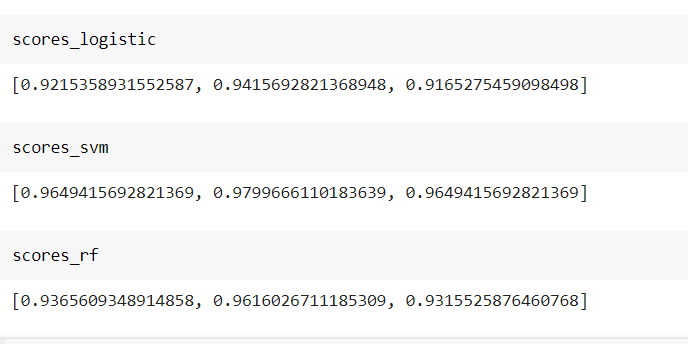